In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
from parsing import parser, digit
from plotting import plotter, voronoi
from analysis import training, sampling, testing
from config import settings

import warnings
warnings.filterwarnings('ignore')

In [71]:
n_observation_classes = 256
n_hidden_states = 30
n_iter = 1000
tol = 1.0

In [72]:
parse = parser.Parser();
train_digits = parse.parse_file('data/pendigits-train');
test_digits = parse.parse_file('data/pendigits-test')

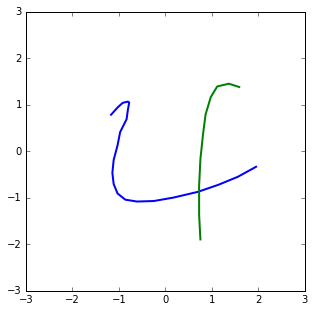

In [73]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(train_digits[6], True)

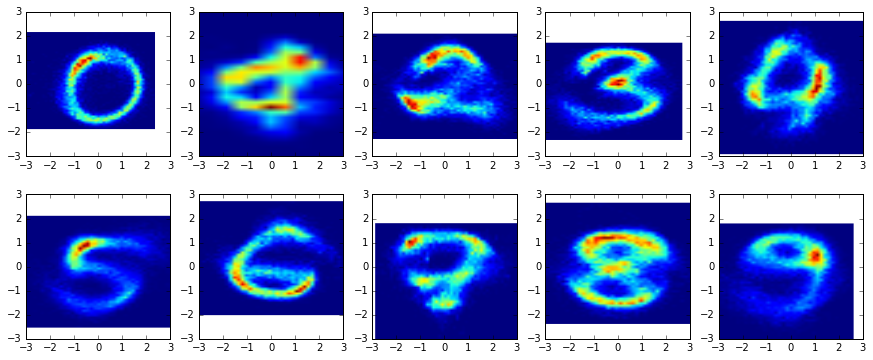

In [74]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digits_heatmap(train_digits, True);

In [75]:
centroids = training.get_digit_kmeans_centroids(train_digits, n_observation_classes - 3)

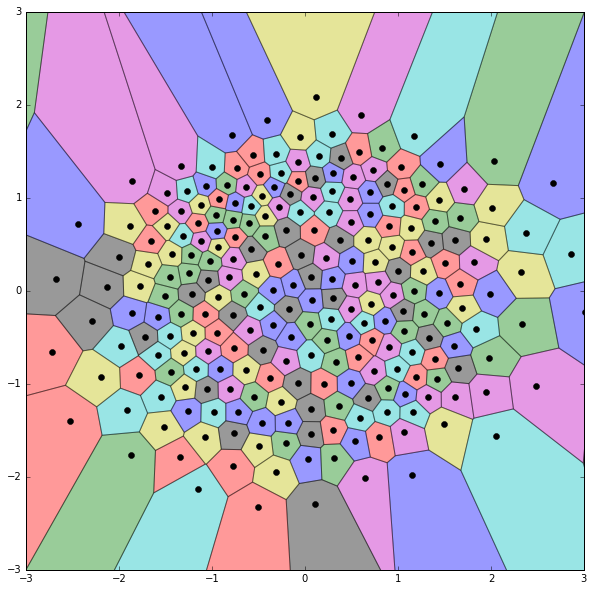

In [76]:
pylab.rcParams['figure.figsize'] = (10, 10);
voronoi.plot_centroids(centroids);

In [77]:
training.set_digit_observations(train_digits, centroids, n_observation_classes)

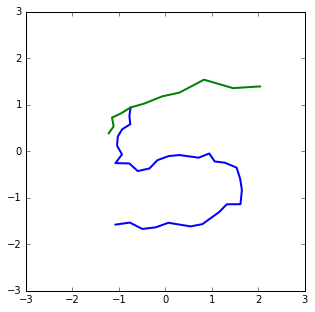

In [78]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit_observations(train_digits[8], centroids, n_observation_classes, True)

In [79]:
hidden_markov_models = training.train_hmm(train_digits, n_observation_classes, n_hidden_states, n_iter, tol)

In [80]:
samplings = sampling.get_samplings(hidden_markov_models, n_observation_classes, centroids, 100)

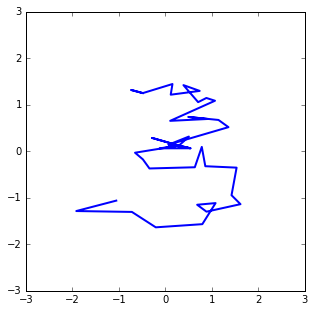

In [81]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(samplings[2][5], True)

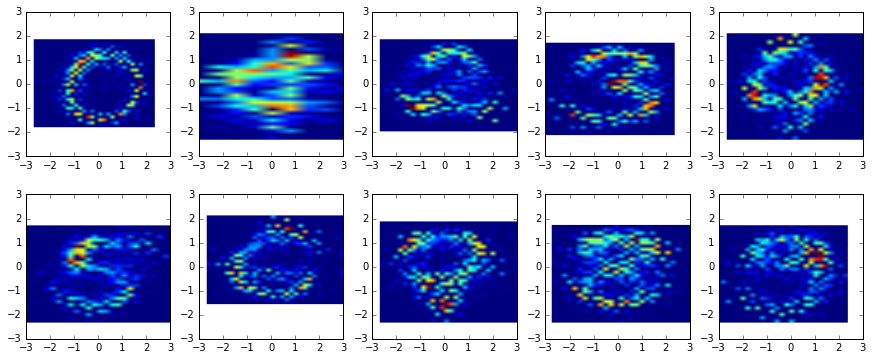

In [82]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digit_samples_heatmap(samplings)

In [108]:
predicted_labels = testing.predict_labels(test_digits, hidden_markov_models, centroids, n_observation_classes, n_hidden_states, n_iter, tol, True)

In [110]:
testing.evaluate_classification_accuracy(test_digits, predicted_labels)

0.7143265656276808